In [145]:
# Initial imports
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [146]:
# Set the random seed for reproducibility
# Note: This is used for model prototyping, but it is good practice to comment this out and run multiple experiments to evaluate your model.
from numpy.random import seed

seed(1)
from tensorflow import random

random.set_seed(2)

In [147]:
# Read in data
data = Path("tsla_cleansed.csv")
stock_df = pd.read_csv(data)
#df.sort_values("date")
stock_df.head()

,date,compound,negative,neutral,positive,text,Prices
0,2012-05-23,0.9972,0.067,0.737,0.197,In today s bubble 2 0 world billions of VC do...,0.007470
1,2012-06-21,0.6808,0.067,0.836,0.097,EquitiesAsian markets gained on Wednesday ahe...,-0.048239
2,2012-08-05,0.9971,0.034,0.822,0.144,Entrepreneurs that have the capacity to change...,NaN
3,2012-10-19,0.9898,0.069,0.781,0.150,Google Inc GOOG got caught naked yesterday ...,-0.010734
4,2012-11-19,0.9893,0.006,0.917,0.077,Recent Performance of the Stocks Mentioned Bel...,0.031387


In [148]:
stock_df = stock_df.drop(columns=["text"])

In [149]:
stock_df.dropna(inplace=True)

In [150]:
def window_data(df, window, feature_col_number, target_col_number):
    """
    This function accepts the column number for the features (X) and the target (y).
    It chunks the data up with a rolling window of Xt - window to predict Xt.
    It returns two numpy arrays of X and y.
    """
    X = []
    y = []
    for i in range(len(df) - window):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [151]:
# Creating the features (X) and target (y) data using the window_data() function.
window_size = 30

feature_column = 5
target_column = 5
X, y = window_data(stock_df, window_size, feature_column, target_column)
print (f"X sample values:\n{X[:5]} \n")
print (f"y sample values:\n{y[:5]}")

X sample values:
[[ 0.00746996 -0.04823912 -0.01073428  0.03138732  0.03359253 -0.04794326
  -0.00582573 -0.02165605 -0.00992619 -0.09618766 -0.07307172 -0.07307172
  -0.00263505  0.05123157 -0.01765202  0.00414383  0.24573685  0.10605187
   0.10605187  0.10605187  0.10605187 -0.05216995 -0.05216995  0.08675271
   0.08675271 -0.00770173 -0.00770173  0.06528224  0.04620355 -0.05071215]
 [-0.04823912 -0.01073428  0.03138732  0.03359253 -0.04794326 -0.00582573
  -0.02165605 -0.00992619 -0.09618766 -0.07307172 -0.07307172 -0.00263505
   0.05123157 -0.01765202  0.00414383  0.24573685  0.10605187  0.10605187
   0.10605187  0.10605187 -0.05216995 -0.05216995  0.08675271  0.08675271
  -0.00770173 -0.00770173  0.06528224  0.04620355 -0.05071215 -0.05071215]
 [-0.01073428  0.03138732  0.03359253 -0.04794326 -0.00582573 -0.02165605
  -0.00992619 -0.09618766 -0.07307172 -0.07307172 -0.00263505  0.05123157
  -0.01765202  0.00414383  0.24573685  0.10605187  0.10605187  0.10605187
   0.10605187 -0.05

In [152]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [153]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [154]:
y_test

array([[0.34683654],
       [0.29137195],
       [0.33737886],
       ...,
       [0.76997816],
       [0.76997816],
       [0.76997816]])

In [155]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.38071768]
  [0.23592354]
  [0.33340282]
  [0.44288158]
  [0.44861318]
  [0.23669252]
  [0.34616069]
  [0.30501592]
  [0.33550314]
  [0.11129993]
  [0.17138085]
  [0.17138085]
  [0.35445364]
  [0.494459  ]
  [0.31542286]
  [0.3720727 ]
  [1.        ]
  [0.77920586]
  [0.77920586]
  [0.77920586]
  [0.77920586]
  [0.27611905]
  [0.27611905]
  [0.71784167]
  [0.71784167]
  [0.41751154]
  [0.41751154]
  [0.64957353]
  [0.58891037]
  [0.28075433]]

 [[0.23592354]
  [0.33340282]
  [0.44288158]
  [0.44861318]
  [0.23669252]
  [0.34616069]
  [0.30501592]
  [0.33550314]
  [0.11129993]
  [0.17138085]
  [0.17138085]
  [0.35445364]
  [0.494459  ]
  [0.31542286]
  [0.3720727 ]
  [1.        ]
  [0.63694311]
  [0.77920586]
  [0.77920586]
  [0.77920586]
  [0.27611905]
  [0.27611905]
  [0.71784167]
  [0.71784167]
  [0.41751154]
  [0.41751154]
  [0.64957353]
  [0.58891037]
  [0.28075433]
  [0.28075433]]

 [[0.33340282]
  [0.44288158]
  [0.44861318]
  [0.23669252]
  [0.34616069

In [156]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [157]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [158]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [159]:
# Summarize the model
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 30, 5)             140       
_________________________________________________________________
dropout_21 (Dropout)         (None, 30, 5)             0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 30, 5)             220       
_________________________________________________________________
dropout_22 (Dropout)         (None, 30, 5)             0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 5)                 220       
_________________________________________________________________
dropout_23 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [160]:
X_train = X_train.astype("float32")
X_train

array([[[0.38071766],
        [0.23592354],
        [0.3334028 ],
        ...,
        [0.6495735 ],
        [0.58891034],
        [0.28075433]],

       [[0.23592354],
        [0.3334028 ],
        [0.44288158],
        ...,
        [0.58891034],
        [0.28075433],
        [0.28075433]],

       [[0.3334028 ],
        [0.44288158],
        [0.44861317],
        ...,
        [0.28075433],
        [0.28075433],
        [0.45138955]],

       ...,

       [[0.422499  ],
        [0.422499  ],
        [0.422499  ],
        ...,
        [0.44226032],
        [0.44226032],
        [0.5301787 ]],

       [[0.422499  ],
        [0.422499  ],
        [0.36821184],
        ...,
        [0.44226032],
        [0.5301787 ],
        [0.5301787 ]],

       [[0.422499  ],
        [0.36821184],
        [0.36821184],
        ...,
        [0.5301787 ],
        [0.5301787 ],
        [0.34683654]]], dtype=float32)

In [161]:
y_train = y_train.astype('float32')
y_train

array([[0.28075433],
       [0.45138955],
       [0.45138955],
       ...,
       [0.5301787 ],
       [0.34683654],
       [0.34683654]], dtype=float32)

In [162]:
# Train the model
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
2722/2722 [==============================] - 42s 14ms/step - loss: 0.0308
Epoch 2/10
2722/2722 [==============================] - 37s 14ms/step - loss: 0.0123
Epoch 3/10
2722/2722 [==============================] - 41s 15ms/step - loss: 0.0107
Epoch 4/10
2722/2722 [==============================] - 36s 13ms/step - loss: 0.0095
Epoch 5/10
2722/2722 [==============================] - 36s 13ms/step - loss: 0.0085
Epoch 6/10
2722/2722 [==============================] - 36s 13ms/step - loss: 0.0079
Epoch 7/10
2722/2722 [==============================] - 36s 13ms/step - loss: 0.0075
Epoch 8/10
2722/2722 [==============================] - 37s 14ms/step - loss: 0.0074
Epoch 9/10
2722/2722 [==============================] - 36s 13ms/step - loss: 0.0072
Epoch 10/10
2722/2722 [==============================] - 36s 13ms/step - loss: 0.0076


In [163]:
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [164]:
# Evaluate the model
model.evaluate(X_test, y_test)

37/37 [==============================] - 2s 5ms/step - loss: 0.0058


0.005820677150040865

In [165]:
# Make some predictions
predicted = model.predict(X_test)

In [166]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [167]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
    }, index = stock_df.index[-len(real_prices): ])
stocks.head()

,Real,Predicted
2990,-0.029929,-0.017078
2993,-0.047373,-0.017436
2994,-0.032904,-0.027959
2995,-0.032904,-0.019333
2996,-0.011430,-0.018347


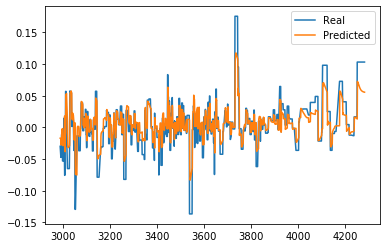

In [168]:
# Plot the real vs predicted prices as a line chart
stocks.plot()